In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [25]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [26]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [27]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [28]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
# Split the dataset into a training set (70%) and a validation set (30%)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [30]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Make predictions on the training dataset
y_train_pred = knn.predict(X_train)

In [32]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)


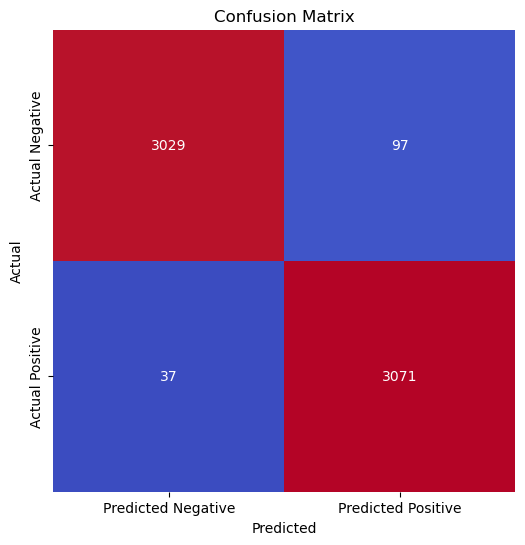

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
confusion_mat = confusion_matrix(y_train, y_train_pred)

# Define custom colors for your heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap with custom colors
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap=cmap, cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/KNN/confusion matrix train data.pdf", format='pdf')


plt.show()

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                3029                  97
Actual Negative                  37                3071


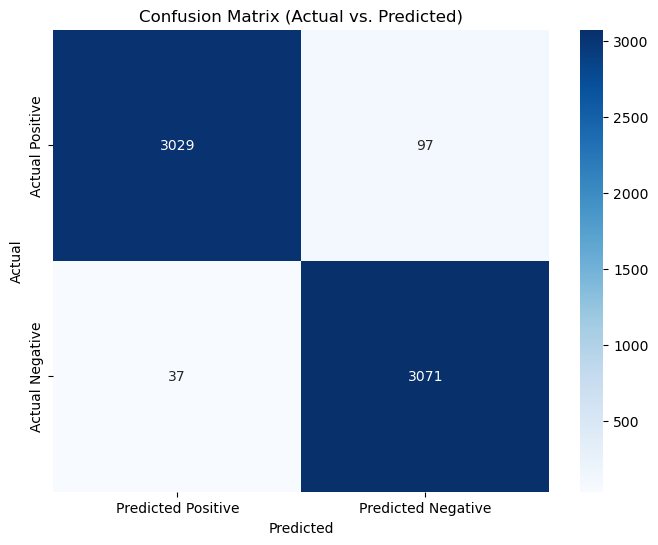

In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/KNN/confusion matrix train data.svg", format='svg')


plt.show()

In [10]:
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()


In [11]:
# Calculate sensitivity, specificity, precision, F1-score, ROC AUC, accuracy, and kappa statistics
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
kappa = cohen_kappa_score(y_train, y_train_pred)

In [14]:
# Print the metrics
# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 10", "Actual 20"], columns=["Predicted 10", "Predicted 20"])

# Print the confusion matrix
print("Confusion Matrix of Training Dataset (Actual vs. Predicted):")
print(conf_matrix_df)
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Precision (Positive Predictive Value):", precision)
print("F1-Score:", f1_score)
print("ROC AUC Score:", roc_auc)
print("Accuracy:", accuracy)
print("Kappa Score:", kappa)

Confusion Matrix of Training Dataset (Actual vs. Predicted):
           Predicted 10  Predicted 20
Actual 10          3029            97
Actual 20            37          3071

Sensitivity (True Positive Rate): 0.9880952380952381
Specificity (True Negative Rate): 0.9689699296225208
Precision (Positive Predictive Value): 0.9693813131313131
F1-Score: 0.9786488209050351
ROC AUC Score: 0.9785325838588794
Accuracy: 0.9785049727301893
Kappa Score: 0.9570119763511219


In [15]:
# Print the classification report for additional statistics
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred, target_names=["10", "20"]))


Classification Report:
              precision    recall  f1-score   support

          10       0.99      0.97      0.98      3126
          20       0.97      0.99      0.98      3108

    accuracy                           0.98      6234
   macro avg       0.98      0.98      0.98      6234
weighted avg       0.98      0.98      0.98      6234



In [19]:
# Convert the target variable to binary format
y_train_binary = label_binarize(y_train, classes=[10, 20])


In [20]:
# Calculate ROC curve for each class
fpr, tpr, thresholds = roc_curve(y_train_binary, knn.predict_proba(X_train)[:, 1])


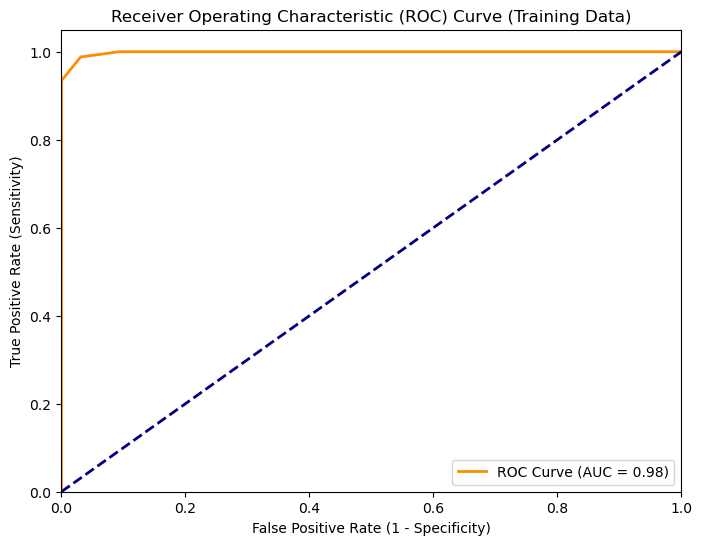

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Training Data)')
plt.legend(loc='lower right')
plt.show()